<a href="https://colab.research.google.com/github/dua-harshit/K-means-Clustering-IRIS-dataset/blob/main/KMeanSClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans Clustering - Unsupervised Learning 
This is a Unsupervised Machine Learning model using the KMeans Clustering Algorithm implemented on the IRIS data set, to predict the optimum number of clusters and represent them visually.


In [2]:
#importing the libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Loading the iris dataset into a dataframe and scoping the data
from sklearn import datasets  #IRIS dataset is toy data set embedded in Sci-kit learn
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()                                    

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters for k-means classification using the elbow method, requires a plot of: 

**Possible K values vs Sum Of Squared Errors**


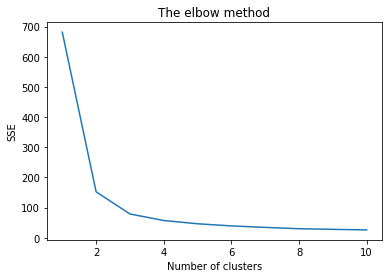

In [5]:
sse = [] #sum of squared errors represents distance between centrids & data points
for i in range (1,11):
  model= KMeans(n_clusters = i)
  model.fit(df.values)
  sse.append(model.inertia_) #inertia or within-cluster sum-of-squares 

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Within cluster sum of squares
plt.show()


It is clear that at number of cluster= k = 3 that SSE doesn't decrease significantly with every iteration. Therefore, optimum number of cluster = 3

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier
model = KMeans(n_clusters = 3)
y_predict = model.fit_predict(df.values)# the cluster in which a particular data point is to be placed into
y_predict
df['cluster'] = y_predict # addding a column to the data frame with their respective cluster numbers
df.head()                             

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


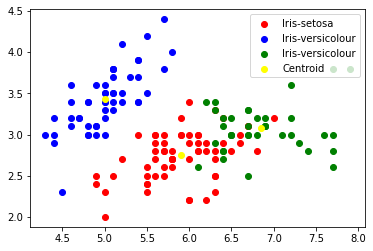

In [52]:
df1 = df[df['cluster']==0] #dividing the dataframe based on distinct clusters
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1.iloc[:,0], df1.iloc[:,1],c='red',label = 'Iris-setosa')
plt.scatter(df2.iloc[:,0], df2.iloc[:,1],c='blue',label = 'Iris-versicolour')
plt.scatter(df3.iloc[:,0], df3.iloc[:,1],c='green',label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1] , c = 'yellow', label = 'Centroid')

plt.legend(loc='upper right')